<a href="https://colab.research.google.com/github/ZahraMoeini/Regression/blob/main/multiple%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Y=H*W+epsilon

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
link =  "https://raw.githubusercontent.com/ZahraMoeini/Regression/main/Data/kc_house_data.csv"


In [3]:
data = pd.read_csv(link, error_bad_lines=False )
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
type(data['price'])

pandas.core.series.Series

In [7]:
Y=data['price']
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built','yr_renovated']       
H=np.matrix(data[features])
D=H.shape

In [8]:
type(H)

numpy.matrix

# feature extraction

# Close form
# $w=(H^T H)^{-1}H^TY$

In [9]:
Yt1=np.array(Y)
Yt1.shape

(21613,)

In [10]:
Yt1=Yt1.reshape((Yt1.shape[0],1))
Yt1.shape

(21613, 1)

In [11]:
type(Yt1)

numpy.ndarray

In [12]:
Yt2=np.matrix(Y)
Yt2.shape

(1, 21613)

In [13]:
Yt2=Yt2.T
Yt2.shape

(21613, 1)

In [14]:
type(Yt2)

numpy.matrix

In [15]:
HT=H.T

In [16]:
HT.shape

(9, 21613)

In [17]:
t1=HT*H
t2=np.linalg.pinv(t1)
t3=t2*HT
w = t3*Yt1
w

matrix([[-5.57050697e+04],
        [ 2.87151030e+03],
        [ 2.12835259e+02],
        [-3.41284570e-01],
        [ 1.48684739e+04],
        [ 9.19455753e+01],
        [ 1.20889247e+02],
        [ 2.78751278e+01],
        [ 7.79024992e+01]])

In [18]:
Y_hat=H*w

In [19]:
RSS=np.asscalar(((np.array(Y).reshape(Y.shape[0],1)-Y_hat).T)*(np.array(Y).reshape(Y.shape[0],1)-Y_hat))
"{:e}".format(RSS)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """Entry point for launching an IPython kernel.


'1.410291e+15'

In [21]:
Y=np.array(Y).reshape(Y.shape[0],1)
D=H.shape[1]


Gradient Descent

Wt+1=Wt−η∇WtRSS(W) 
  ∇wtRSS(W)=−2HT(Y−Y^) 
  Y^=H×W

In [22]:
eta_list = [1e-20,1e-18]
eta_RSS=dict()
for i in range(len(eta_list)):
  W=np.zeros((D,1)) 
  RSS_list=[]          
  g_list=[]  
  t=1
  e=0.0001
  c=False
  T = 10000
  t=0
  eta=eta_list[i]
  while not c:
    Y_hat=H*W
    RSS=np.asscalar(((Y-Y_hat).T)*(Y-Y_hat))
    RSS_list.append(RSS)
    g= -2* H.T*(Y-Y_hat)
    g_list.append(g)
    if abs(g).sum()<e:
      c=True  
    if t>=T:
      c=True
    W=W-eta*g 
    t+=1
  eta_RSS[i]=RSS_list




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  from ipykernel import kernelapp as app


In [23]:
g

matrix([[-7.65457652e+10],
        [-5.13314037e+10],
        [-5.39335078e+13],
        [-1.76182771e+14],
        [-3.41949182e+10],
        [-4.54570658e+13],
        [-8.47644202e+12],
        [-4.22113749e+13],
        [-2.59665370e+12]])

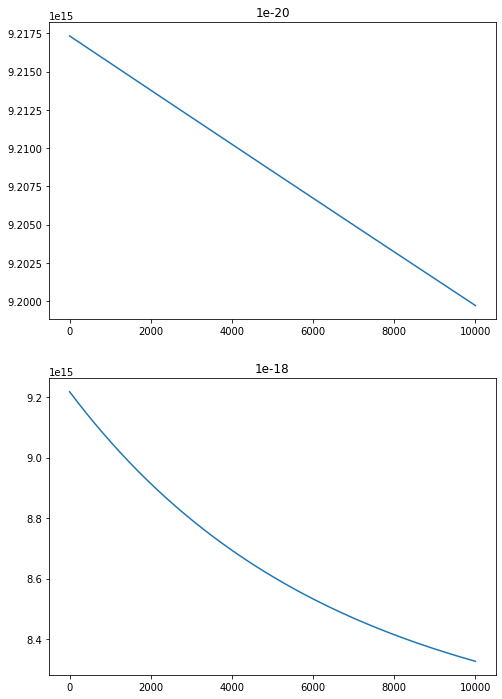

In [24]:
fig = plt.figure(figsize=(8,12))
for i in range(len(eta_RSS)):
  ax = fig.add_subplot(len(eta_RSS),1,i+1)
  ax.plot(np.arange(len(eta_RSS[i])),eta_RSS[i])
  ax.set_title(str(eta_list[i]))

In [25]:
eta_RSS[0][-1]

9199711970309108.0

In [26]:
"{:e}".format(eta_RSS[1][-1])

'8.327160e+15'

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
y= data['price']
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built','yr_renovated']       
X=data[features]

In [29]:
lr_model= LinearRegression()

In [30]:
lr_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_hat = lr_model.predict(X)

In [32]:
RSS = np.sum((y-y_hat)**2)
"{:e}".format(RSS)

'1.290962e+15'

In [33]:
from sklearn.ensemble import RandomForestRegressor


In [34]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)


In [35]:
rf.fit(X, y)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [36]:
y_hat = rf.predict(X)


In [37]:
RSS = np.sum((y-y_hat)**2)
"{:e}".format(RSS)

'1.528831e+14'